In [ ]:
%pip install "dask[complete]"
%pip install squarify

In [3]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import squarify

%matplotlib inline

# Read file from Google Cloud Storage
---

In [4]:
data_oct = dd.read_csv('gs://ecommerce-behavior-data/2019-Oct.csv')
data_nov = dd.read_csv('gs://ecommerce-behavior-data/2019-Nov.csv')
data_dec = dd.read_csv('gs://ecommerce-behavior-data/2019-Dec.csv')

1 Descriptive Analytics
---

### 1. Number of people visit the site in each month

In [ ]:
oct_visitor = data_oct['user_id'].nunique()
nov_visitor = data_nov['user_id'].nunique()
dec_visitor = data_dec['user_id'].nunique()

print("Visitor in october: {}".format(oct_visitor.compute()))
print("Visitor in november: {}".format(nov_visitor.compute()))
print("Visitor in december: {}".format(dec_visitor.compute()))

### 2. Visitors daily trend

In [ ]:
# October
df = data_oct.compute()

d = df.loc[:,['event_time', 'user_id']]
d['event_time'] = d['event_time'].apply(lambda s: str(s)[0:10])
visitor_october = d.drop_duplicates().groupby(['event_time'])['user_id']
                                     .agg(['count'])
                                     .sort_values(by=['event_time'], ascending=True)

del df, d # free memory

In [ ]:
# November
df = data_nov.compute()

d = df.loc[:,['event_time', 'user_id']]
d['event_time'] = d['event_time'].apply(lambda s: str(s)[0:10])
visitor_november = d.drop_duplicates().groupby(['event_time'])['user_id']
                                      .agg(['count'])
                                      .sort_values(by=['event_time'], ascending=True)

del df, d # free memory

In [ ]:
# December
df = data_dec.compute()

d = df.loc[:,['event_time', 'user_id']]
d['event_time'] = d['event_time'].apply(lambda s: str(s)[0:10])
visitor_december = d.drop_duplicates().groupby(['event_time'])['user_id']
                                      .agg(['count'])
                                      .sort_values(by=['event_time'], ascending=True)

del df, d # free memory

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_axes([0, 0, 1, 1])

x = pd.Series(range(1, 32))

# October
y_oct = visitor_october.set_index(x)
ax.plot(x, y_oct, label="October")

# # November
y_nov = visitor_november.append({"count": None}, ignore_index=True).set_index(x)
ax.plot(x, y_nov, label="November")

# December
y_dec = visitor_december.set_index(x)
ax.plot(x, y_dec, label="December")

ax.legend()
plt.title("Visitors Daily Trend in Q4 2019")
plt.xticks(x)

plt.show()

### 3. Top 15 category and product

In [6]:
# Set top N category
top_category_n = 15

# Set plot figure size
plt.rcParams['figure.figsize'] = (20, 13)

In [ ]:
# October
top_category_oct = data_oct.loc[:,'category_code'].compute()
top_category_oct = top_category_oct.value_counts()[:top_category_n].sort_values(ascending=False)

In [ ]:
labels = top_category_oct.index.array
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

squarify.plot(sizes=top_category_oct, label=labels, color=colors, alpha=0.8)

plt.axis('off')
plt.show()

In [ ]:
# November
top_category_nov = data_nov.loc[:,'category_code'].compute()
top_category_nov = top_category_nov.value_counts()[:top_category_n].sort_values(ascending=False)

In [ ]:
labels = top_category_nov.index.array
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

squarify.plot(sizes=top_category_nov, label=top_category_nov.index.array, alpha=0.8)

plt.axis('off')
plt.show()

In [7]:
# December
top_category_dec = data_dec.loc[:,'category_code'].compute()
top_category_dec = top_category_dec.value_counts()[:top_category_n].sort_values(ascending=False)

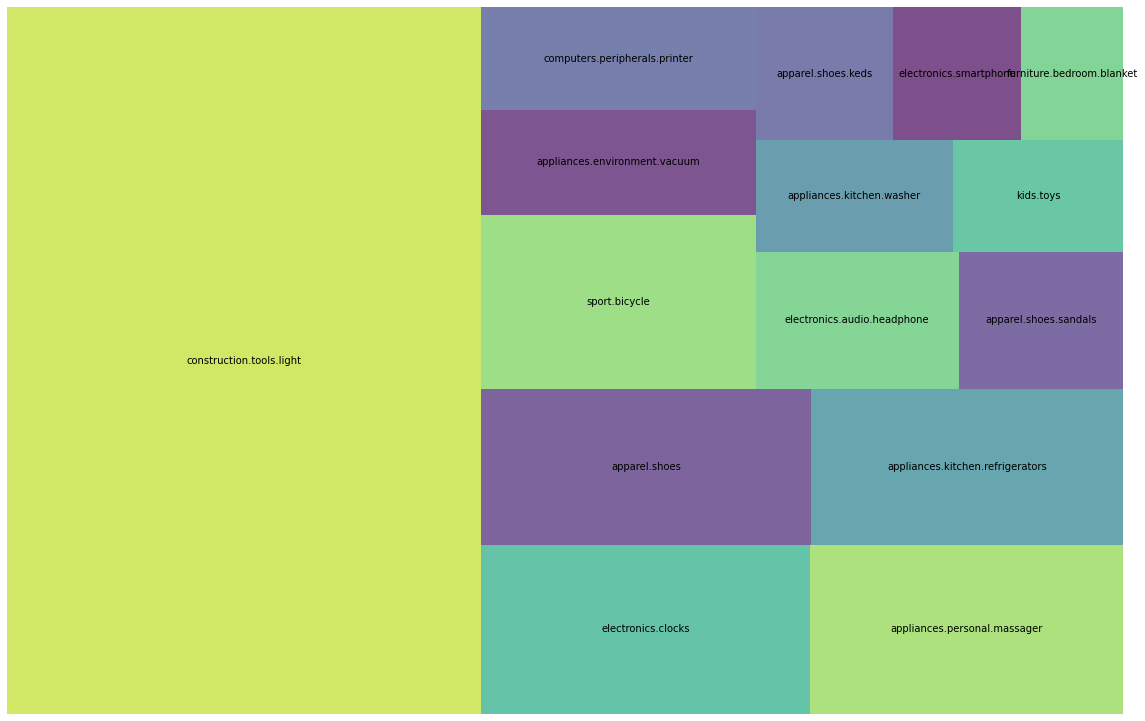

In [11]:
labels = top_category_dec.index.array
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

squarify.plot(sizes=top_category_dec, label=top_category_dec.index.array, alpha=0.7)

plt.axis('off')
plt.show()

### 4. Average customer view product before add to cart

### 5. Average Order Value (AOV)